## 1. Data Exploration

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df =pd.read_csv("heart_cleveland_upload.csv")
# Display first 5 rows
print(df.head())
# Shape of the dataset
print(df.shape)
# General information
print(df.info())
# Summary statistics for numeric columns
print(df.describe())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  
(297, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   cho

In [ ]:
print(df.mean(numeric_only=True))
print(df.median(numeric_only=True))
print(df.std(numeric_only=True))


age           54.542088
sex            0.676768
cp             2.158249
trestbps     131.693603
chol         247.350168
fbs            0.144781
restecg        0.996633
thalach      149.599327
exang          0.326599
oldpeak        1.055556
slope          0.602694
ca             0.676768
thal           0.835017
condition      0.461279
dtype: float64
age           56.0
sex            1.0
cp             2.0
trestbps     130.0
chol         243.0
fbs            0.0
restecg        1.0
thalach      153.0
exang          0.0
oldpeak        0.8
slope          1.0
ca             0.0
thal           0.0
condition      0.0
dtype: float64
age           9.049736
sex           0.468500
cp            0.964859
trestbps     17.762806
chol         51.997583
fbs           0.352474
restecg       0.994914
thalach      22.941562
exang         0.469761
oldpeak       1.166123
slope         0.618187
ca            0.938965
thal          0.956690
condition     0.499340
dtype: float64


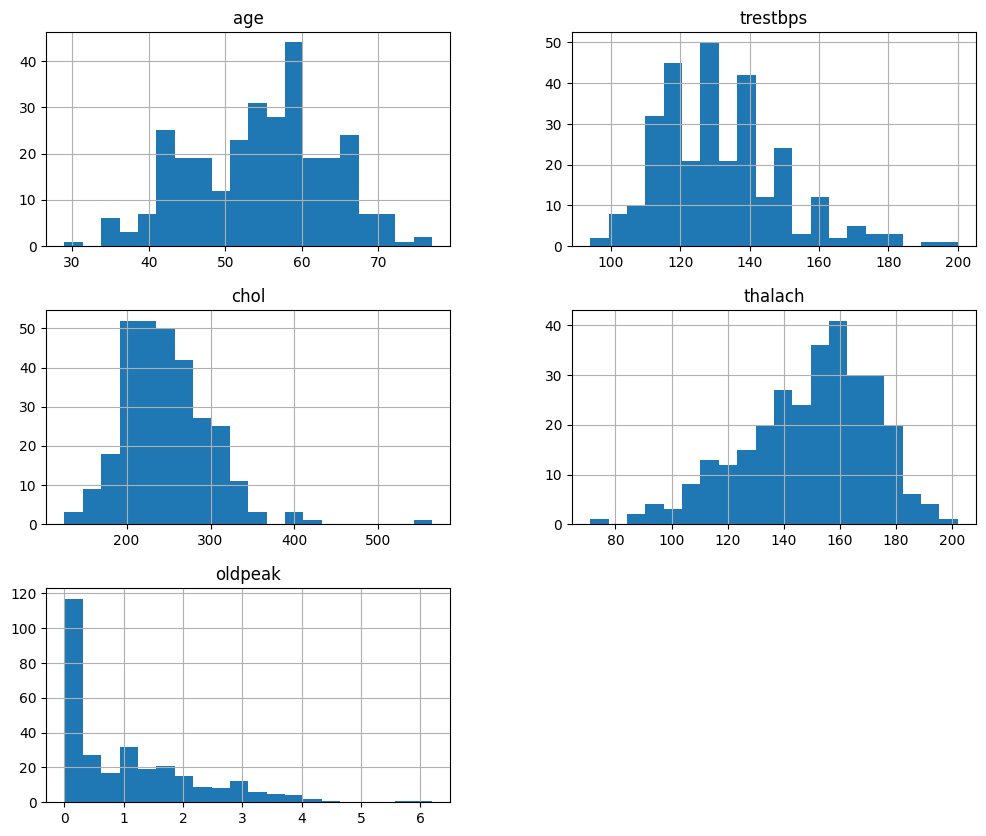

In [ ]:
# Histogrammes
df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].hist(figsize=(12,10), bins=20)
plt.show()



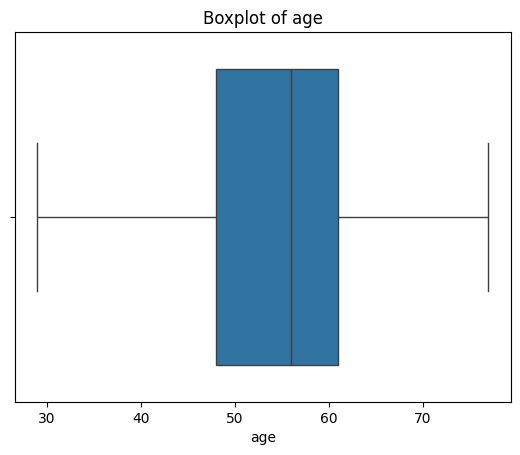

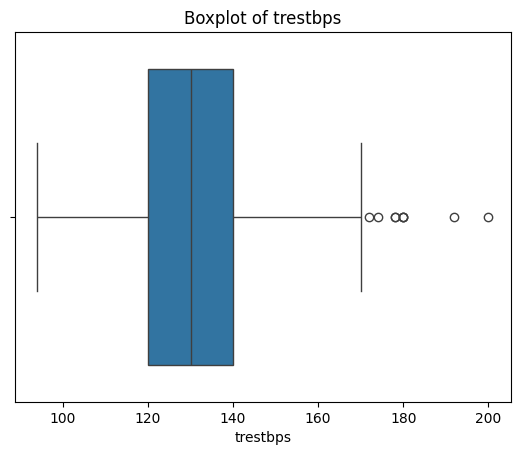

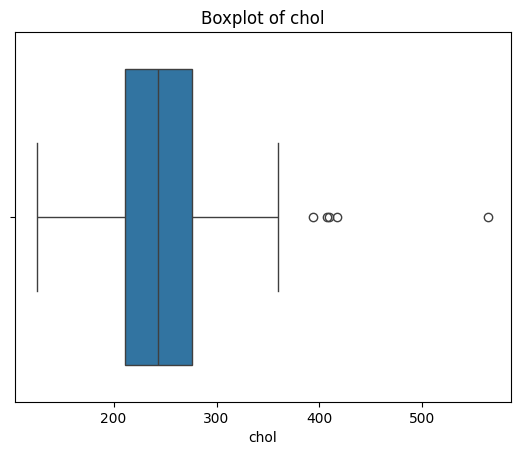

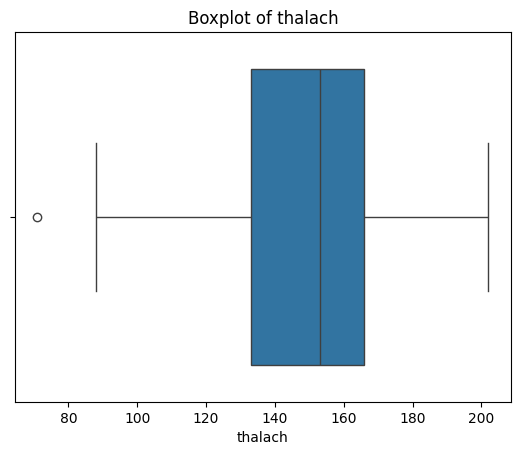

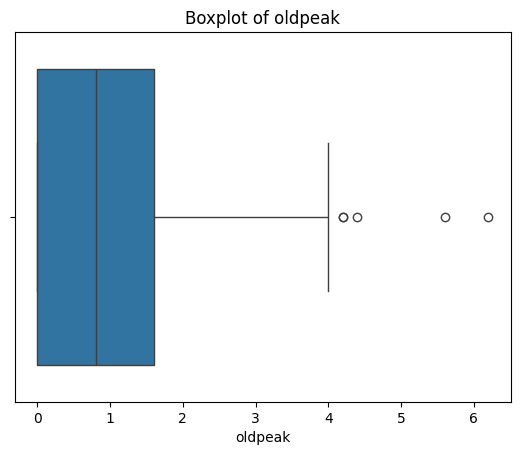

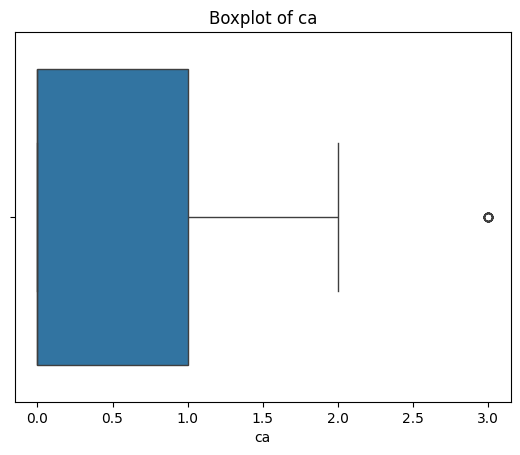

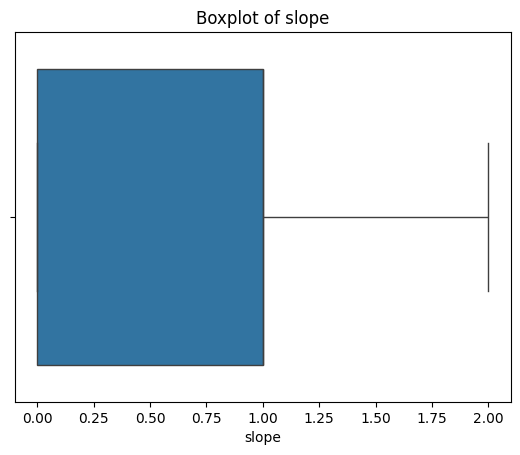

In [ ]:
# Boxplots
for col in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'slope']:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

<Axes: >

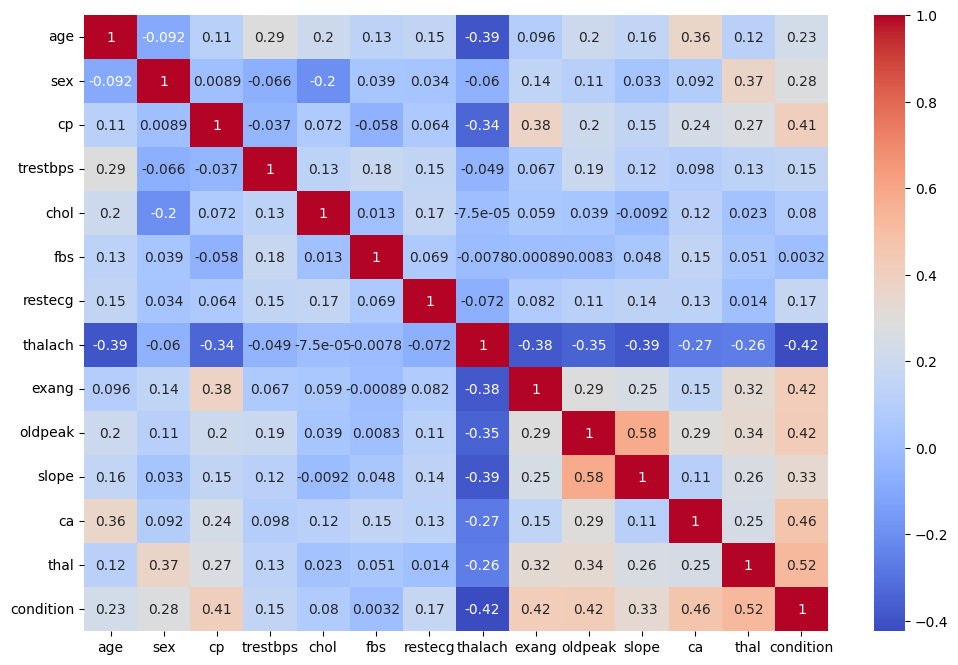

In [ ]:
# Correlation
corr=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

#### General Interpretation
- Dataset is **clean**: no missing values.    
- Presence of some **outliers** (`chol`, `trestbps`, `oldpeak`)
- No strong correlation between feature


# 2. Data Preprocessing




#### Handling Missing Values
- **Not needed**: the dataset has no missing values, so no imputation is required.

#### Encoding Categorical Variables
- **Not needed**: all features are already numeric, so encoding is not necessary.

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_cols = df.drop('condition', axis=1).select_dtypes(include=np.number).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [ ]:
# Check the dataset after scaling
print(df.info())
print(df.head())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    float64
 1   sex        297 non-null    float64
 2   cp         297 non-null    float64
 3   trestbps   297 non-null    float64
 4   chol       297 non-null    float64
 5   fbs        297 non-null    float64
 6   restecg    297 non-null    float64
 7   thalach    297 non-null    float64
 8   exang      297 non-null    float64
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    float64
 11  ca         297 non-null    float64
 12  thal       297 non-null    float64
 13  condition  297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 32.6 KB
None
        age       sex        cp  trestbps      chol       fbs   restecg  \
0  1.600302  0.691095 -2.240629  1.596266 -0.257179  2.430427  1.010199   
1  1.600302 -1.446980 -2.240629  0.468418 -0.160

In [ ]:
X=df.drop('condition',axis=1)
y=df['condition']
print(X.head())
print(y.head())


        age       sex        cp  trestbps      chol       fbs   restecg  \
0  1.600302  0.691095 -2.240629  1.596266 -0.257179  2.430427  1.010199   
1  1.600302 -1.446980 -2.240629  0.468418 -0.160859 -0.411450 -1.003419   
2  1.268242 -1.446980 -2.240629  1.032342 -0.411292 -0.411450 -1.003419   
3  1.157555  0.691095 -2.240629  0.355633  0.667499  2.430427  1.010199   
4  1.046868  0.691095 -2.240629 -1.223355 -0.700254 -0.411450  1.010199   

    thalach     exang   oldpeak     slope        ca      thal  
0 -0.812095 -0.696419 -0.820813  0.643781  0.344824 -0.874292  
1  0.061157 -0.696419  0.639470 -0.976583  1.411625 -0.874292  
2 -1.554358 -0.696419  1.326662  2.264145 -0.721976 -0.874292  
3  1.065396 -0.696419  0.295874  0.643781  0.344824 -0.874292  
4 -0.244481  1.435916  0.639470  0.643781 -0.721976 -0.874292  
0    0
1    0
2    0
3    1
4    0
Name: condition, dtype: int64


# 3. Modeling

In [ ]:
import torch
import numpy as np
from torch.utils.data import DataLoader, TensorDataset, random_split

#  Convert X and y to NumPy arrays
X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.int64)

print("Shape X:", X.shape)
print("Shape y:", y.shape)

# Convert NumPy arrays to PyTorch tensors
X_tensor = torch.from_numpy(X)
y_tensor = torch.from_numpy(y).float().unsqueeze(1)

# Create full dataset
dataset = TensorDataset(X_tensor, y_tensor)

#  Split into train and evaluation
train_size = int(0.8 * len(dataset))  # 80% for training
eval_size = len(dataset) - train_size  # 20% for evaluation

train_dataset, eval_dataset = random_split(dataset, [train_size, eval_size])

# Create DataLoaders
batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
eval_loader = DataLoader(eval_dataset, batch_size=batch_size, shuffle=False)

print("Number of training batches:", len(train_loader))
print("Number of evaluation batches:", len(eval_loader))


Shape X: (297, 13)
Shape y: (297,)
Number of training batches: 15
Number of evaluation batches: 4


In [ ]:
import torch.nn as nn
# Define the model
model=nn.Sequential(
    nn.Linear(13,32),
    nn.ReLU(),
    nn.Linear(32,16),
    nn.ReLU(),
    nn.Linear(16,1),
    nn.Sigmoid()
)

In [ ]:
import torch.nn.init as init
# initialization
# Input layer , He initialization
init.kaiming_uniform_(model[0].weight, nonlinearity='relu')
init.constant_(model[0].bias, 0)

# Hidden layer , He initialization
init.kaiming_uniform_(model[2].weight, nonlinearity='relu')
init.constant_(model[2].bias, 0)

# Output layer , Xavier initialization
init.xavier_uniform_(model[4].weight)
init.constant_(model[4].bias, 0)

Parameter containing:
tensor([0.], requires_grad=True)

In [ ]:
import torch.optim as optim

# Define the loss function
criterion = nn.BCELoss()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [35]:
# Mini-Batch Gradient Descent Training with Train/Evaluation split
num_epochs = 50
train_losses = []
eval_losses = []
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0

    # --- Training loop ---
    for inputs, targets in train_loader:
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()

        # Update weights
        optimizer.step()

        running_loss += loss.item()

    # Compute average training loss
    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # --- Evaluation loop ---
    model.eval()
    eval_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, targets in eval_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            eval_loss += loss.item()

            # Compute accuracy
            predictions = (outputs > 0.5).float()
            correct += (predictions == targets).sum().item()
            total += targets.size(0)

    avg_eval_loss = eval_loss / len(eval_loader)
    eval_losses.append(avg_eval_loss)
    accuracy = correct / total

    print(f"Epoch [{epoch+1}/{num_epochs}] - "
          f"Train Loss: {avg_train_loss:.4f} - "
          f"Eval Loss: {avg_eval_loss:.4f} - "
          f"Eval Accuracy: {accuracy*100:.2f}%")


Epoch [1/50] - Train Loss: 0.1524 - Eval Loss: 0.5925 - Eval Accuracy: 78.33%
Epoch [2/50] - Train Loss: 0.1508 - Eval Loss: 0.5975 - Eval Accuracy: 78.33%
Epoch [3/50] - Train Loss: 0.1506 - Eval Loss: 0.6063 - Eval Accuracy: 78.33%
Epoch [4/50] - Train Loss: 0.1464 - Eval Loss: 0.6038 - Eval Accuracy: 78.33%
Epoch [5/50] - Train Loss: 0.1442 - Eval Loss: 0.6073 - Eval Accuracy: 78.33%
Epoch [6/50] - Train Loss: 0.1421 - Eval Loss: 0.6168 - Eval Accuracy: 78.33%
Epoch [7/50] - Train Loss: 0.1381 - Eval Loss: 0.6178 - Eval Accuracy: 78.33%
Epoch [8/50] - Train Loss: 0.1368 - Eval Loss: 0.6212 - Eval Accuracy: 78.33%
Epoch [9/50] - Train Loss: 0.1340 - Eval Loss: 0.6302 - Eval Accuracy: 78.33%
Epoch [10/50] - Train Loss: 0.1308 - Eval Loss: 0.6328 - Eval Accuracy: 78.33%
Epoch [11/50] - Train Loss: 0.1298 - Eval Loss: 0.6427 - Eval Accuracy: 78.33%
Epoch [12/50] - Train Loss: 0.1270 - Eval Loss: 0.6431 - Eval Accuracy: 78.33%
Epoch [13/50] - Train Loss: 0.1248 - Eval Loss: 0.6573 - Eval

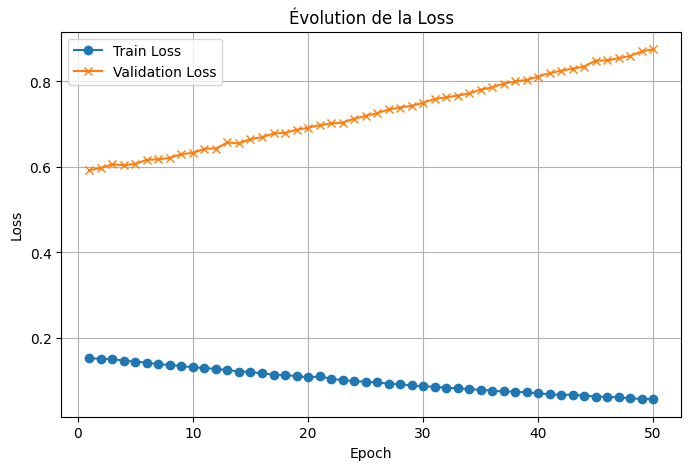

In [36]:
import matplotlib.pyplot as plt
# Visualisation
plt.figure(figsize=(8,5))
plt.plot(range(1, num_epochs+1), train_losses, label="Train Loss", marker='o')
plt.plot(range(1, num_epochs+1), eval_losses, label="Validation Loss", marker='x')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Évolution de la Loss")
plt.legend()
plt.grid(True)
plt.show()

#### The training loss is decreasing, but the validation loss is increasing.
#### This indicates overfitting: the model is learning the training data too well
####    but is not generalizing to unseen data.


## Hyperparameter tuning with Grid Search

In [41]:
import itertools

# Exemple d’hyperparamètres à tester
hidden_sizes = [[32,16], [64,32], [128,64]]
learning_rates = [0.0005, 0.001, 0.005]
batch_sizes = [16, 32, 64]

# Combinaison de tous les hyperparamètres
param_grid = list(itertools.product(hidden_sizes, learning_rates, batch_sizes))

best_acc = 0
best_params = None

for hidden, lr, batch in param_grid:
    # Créer modèle avec hidden
    model = nn.Sequential(
        nn.Linear(13, hidden[0]),
        nn.ReLU(),
        nn.Linear(hidden[0], hidden[1]),
        nn.ReLU(),
        nn.Linear(hidden[1], 1)
    )
    # Loss, optimizer
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # DataLoader avec batch
    train_loader = DataLoader(train_dataset, batch_size=batch, shuffle=True)
    eval_loader = DataLoader(eval_dataset, batch_size=batch, shuffle=False)

    # Entraînement rapide de quelques epochs pour test
    for epoch in range(10):
        model.train()
        for inputs, targets in train_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # Eval
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, targets in eval_loader:
            outputs = model(inputs)
            predictions = (torch.sigmoid(outputs) > 0.5).float()
            correct += (predictions == targets).sum().item()
            total += targets.size(0)
    acc = correct / total
    if acc > best_acc:
        best_acc = acc
        best_params = (hidden, lr, batch)

print("Meilleurs hyperparamètres :", best_params, "Accuracy :", best_acc)


Meilleurs hyperparamètres : ([64, 32], 0.005, 16) Accuracy : 0.8333333333333334


In [42]:
model=nn.Sequential(
    nn.Linear(13,64),
    nn.ReLU(),
    nn.Linear(64,32),
    nn.ReLU(),
    nn.Linear(32,1),
)

# initialization
# Input layer , He initialization
init.kaiming_uniform_(model[0].weight, nonlinearity='relu')
init.constant_(model[0].bias, 0)

# Hidden layer , He initialization
init.kaiming_uniform_(model[2].weight, nonlinearity='relu')
init.constant_(model[2].bias, 0)

criterion=nn.BCEWithLogitsLoss()
optimizer=optim.Adam(model.parameters(),lr=0.005)

# Mini-Batch Gradient Descent Training with Train/Evaluation split
num_epochs = 50
train_losses = []
eval_losses = []
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0

    # --- Training loop ---
    for inputs, targets in train_loader:
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()

        # Update weights
        optimizer.step()

        running_loss += loss.item()

    # Compute average training loss
    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # --- Evaluation loop ---
    model.eval()
    eval_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, targets in eval_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            eval_loss += loss.item()

            # Compute accuracy
            predictions = (outputs > 0.5).float()
            correct += (predictions == targets).sum().item()
            total += targets.size(0)

    avg_eval_loss = eval_loss / len(eval_loader)
    eval_losses.append(avg_eval_loss)
    accuracy = correct / total

    print(f"Epoch [{epoch+1}/{num_epochs}] - "
          f"Train Loss: {avg_train_loss:.4f} - "
          f"Eval Loss: {avg_eval_loss:.4f} - "
          f"Eval Accuracy: {accuracy*100:.2f}%")





Epoch [1/50] - Train Loss: 0.7030 - Eval Loss: 0.5961 - Eval Accuracy: 66.67%
Epoch [2/50] - Train Loss: 0.4831 - Eval Loss: 0.5052 - Eval Accuracy: 71.67%
Epoch [3/50] - Train Loss: 0.4070 - Eval Loss: 0.4832 - Eval Accuracy: 76.67%
Epoch [4/50] - Train Loss: 0.3404 - Eval Loss: 0.4989 - Eval Accuracy: 75.00%
Epoch [5/50] - Train Loss: 0.3158 - Eval Loss: 0.5311 - Eval Accuracy: 78.33%
Epoch [6/50] - Train Loss: 0.2993 - Eval Loss: 0.5444 - Eval Accuracy: 76.67%
Epoch [7/50] - Train Loss: 0.3007 - Eval Loss: 0.5555 - Eval Accuracy: 75.00%
Epoch [8/50] - Train Loss: 0.2756 - Eval Loss: 0.5603 - Eval Accuracy: 75.00%
Epoch [9/50] - Train Loss: 0.2645 - Eval Loss: 0.5610 - Eval Accuracy: 76.67%
Epoch [10/50] - Train Loss: 0.2600 - Eval Loss: 0.5660 - Eval Accuracy: 78.33%
Epoch [11/50] - Train Loss: 0.2424 - Eval Loss: 0.5657 - Eval Accuracy: 76.67%
Epoch [12/50] - Train Loss: 0.2306 - Eval Loss: 0.5690 - Eval Accuracy: 78.33%
Epoch [13/50] - Train Loss: 0.2235 - Eval Loss: 0.5740 - Eval

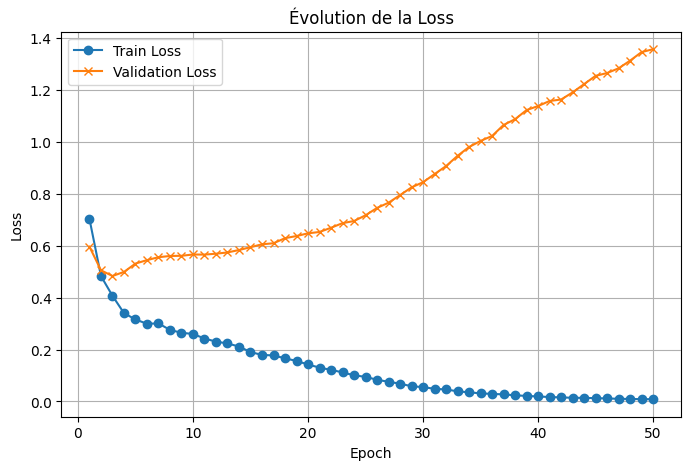

In [43]:
import matplotlib.pyplot as plt
# Visualisation
plt.figure(figsize=(8,5))
plt.plot(range(1, num_epochs+1), train_losses, label="Train Loss", marker='o')
plt.plot(range(1, num_epochs+1), eval_losses, label="Validation Loss", marker='x')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Évolution de la Loss")
plt.legend()
plt.grid(True)
plt.show()

#Reduce overfitting

In [58]:
#Applying dropout
model=nn.Sequential(
    nn.Linear(13,64),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(64,32),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(32,1)
)

# Input layer , He initialization
init.kaiming_uniform_(model[0].weight, nonlinearity='relu')
init.constant_(model[0].bias, 0)

# Hidden layer , He initialization
init.kaiming_uniform_(model[3].weight, nonlinearity='relu')
init.constant_(model[3].bias, 0)

optimizer = optim.Adam(model.parameters(), lr=0.005, weight_decay=1e-4)
criterion = nn.BCEWithLogitsLoss()
# Mini-Batch Gradient Descent Training with Train/Evaluation split
num_epochs = 50
train_losses = []
eval_losses = []
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0

    # --- Training loop ---
    for inputs, targets in train_loader:
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()

        # Update weights
        optimizer.step()

        running_loss += loss.item()

    # Compute average training loss
    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Evaluation loop
    model.eval()
    eval_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, targets in eval_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            eval_loss += loss.item()

            # Compute accuracy
            predictions = (outputs > 0.5).float()
            correct += (predictions == targets).sum().item()
            total += targets.size(0)

    avg_eval_loss = eval_loss / len(eval_loader)
    eval_losses.append(avg_eval_loss)
    accuracy = correct / total

    print(f"Epoch [{epoch+1}/{num_epochs}] - "
          f"Train Loss: {avg_train_loss:.4f} - "
          f"Eval Loss: {avg_eval_loss:.4f} - "
          f"Eval Accuracy: {accuracy*100:.2f}%")





Epoch [1/50] - Train Loss: 0.6312 - Eval Loss: 0.5468 - Eval Accuracy: 66.67%
Epoch [2/50] - Train Loss: 0.5148 - Eval Loss: 0.4809 - Eval Accuracy: 70.00%
Epoch [3/50] - Train Loss: 0.4216 - Eval Loss: 0.4497 - Eval Accuracy: 75.00%
Epoch [4/50] - Train Loss: 0.4064 - Eval Loss: 0.4454 - Eval Accuracy: 78.33%
Epoch [5/50] - Train Loss: 0.3977 - Eval Loss: 0.4365 - Eval Accuracy: 80.00%
Epoch [6/50] - Train Loss: 0.3508 - Eval Loss: 0.4321 - Eval Accuracy: 81.67%
Epoch [7/50] - Train Loss: 0.3300 - Eval Loss: 0.4370 - Eval Accuracy: 80.00%
Epoch [8/50] - Train Loss: 0.3675 - Eval Loss: 0.4442 - Eval Accuracy: 80.00%
Epoch [9/50] - Train Loss: 0.3152 - Eval Loss: 0.4522 - Eval Accuracy: 83.33%
Epoch [10/50] - Train Loss: 0.3013 - Eval Loss: 0.4734 - Eval Accuracy: 83.33%
Epoch [11/50] - Train Loss: 0.3436 - Eval Loss: 0.4948 - Eval Accuracy: 81.67%
Epoch [12/50] - Train Loss: 0.3058 - Eval Loss: 0.4841 - Eval Accuracy: 83.33%
Epoch [13/50] - Train Loss: 0.2872 - Eval Loss: 0.4845 - Eval

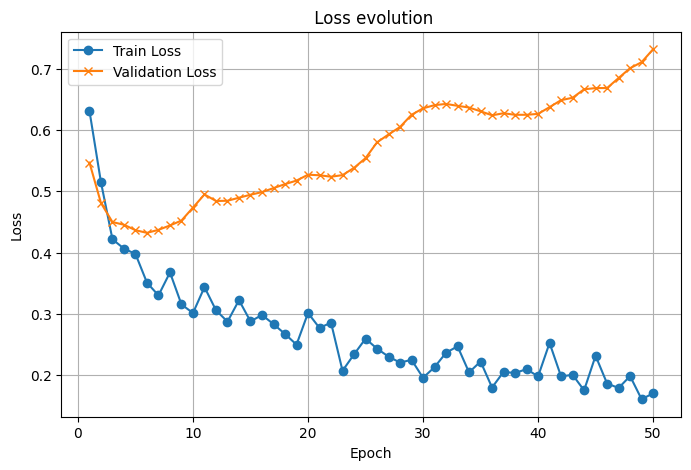

In [59]:
# Visualisation
plt.figure(figsize=(8,5))
plt.plot(range(1, num_epochs+1), train_losses, label="Train Loss", marker='o')
plt.plot(range(1, num_epochs+1), eval_losses, label="Validation Loss", marker='x')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title(" Loss evolution")
plt.legend()
plt.grid(True)
plt.show()

### Applying early stopping

Epoch [1/50] - Train Loss: 0.7613 - Eval Loss: 0.6044 - Accuracy: 68.33% - Precision: 0.91 - Recall: 0.36 - F1-score: 0.51
Epoch [2/50] - Train Loss: 0.6057 - Eval Loss: 0.5100 - Accuracy: 86.67% - Precision: 0.95 - Recall: 0.75 - F1-score: 0.84
Epoch [3/50] - Train Loss: 0.5985 - Eval Loss: 0.4592 - Accuracy: 86.67% - Precision: 0.88 - Recall: 0.82 - F1-score: 0.85
Epoch [4/50] - Train Loss: 0.5300 - Eval Loss: 0.4242 - Accuracy: 88.33% - Precision: 0.86 - Recall: 0.89 - F1-score: 0.88
Epoch [5/50] - Train Loss: 0.4961 - Eval Loss: 0.3962 - Accuracy: 88.33% - Precision: 0.86 - Recall: 0.89 - F1-score: 0.88
Epoch [6/50] - Train Loss: 0.4878 - Eval Loss: 0.3814 - Accuracy: 88.33% - Precision: 0.86 - Recall: 0.89 - F1-score: 0.88
Epoch [7/50] - Train Loss: 0.4685 - Eval Loss: 0.3653 - Accuracy: 86.67% - Precision: 0.86 - Recall: 0.86 - F1-score: 0.86
Epoch [8/50] - Train Loss: 0.4167 - Eval Loss: 0.3547 - Accuracy: 86.67% - Precision: 0.86 - Recall: 0.86 - F1-score: 0.86
Epoch [9/50] - T

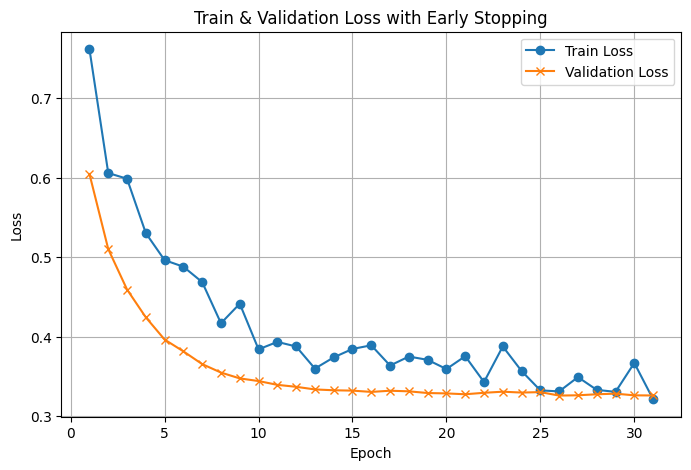

In [61]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Model
model = nn.Sequential(
    nn.Linear(13, 64),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(32, 1)
)

# Initialization
init.kaiming_uniform_(model[0].weight, nonlinearity='relu')
init.constant_(model[0].bias, 0)
init.kaiming_uniform_(model[3].weight, nonlinearity='relu')
init.constant_(model[3].bias, 0)

# Loss and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

# Early stopping parameters
patience = 5
best_eval_loss = float('inf')
epochs_no_improve = 0
early_stop = False

# Training setup
num_epochs = 50
train_losses = []
eval_losses = []

for epoch in range(num_epochs):
    if early_stop:
        print(f"Early stopping at epoch {epoch+1}")
        break

    # --- Training ---
    model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # --- Evaluation ---
    model.eval()
    eval_loss = 0.0
    all_targets = []
    all_preds = []

    with torch.no_grad():
        for inputs, targets in eval_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            eval_loss += loss.item()

            preds = (torch.sigmoid(outputs) > 0.5).float()
            all_targets.extend(targets.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())

    avg_eval_loss = eval_loss / len(eval_loader)
    eval_losses.append(avg_eval_loss)

    # --- Metrics ---
    accuracy = (np.array(all_preds) == np.array(all_targets)).mean()
    precision = precision_score(all_targets, all_preds)
    recall = recall_score(all_targets, all_preds)
    f1 = f1_score(all_targets, all_preds)

    print(f"Epoch [{epoch+1}/{num_epochs}] - "
          f"Train Loss: {avg_train_loss:.4f} - "
          f"Eval Loss: {avg_eval_loss:.4f} - "
          f"Accuracy: {accuracy*100:.2f}% - "
          f"Precision: {precision:.2f} - "
          f"Recall: {recall:.2f} - "
          f"F1-score: {f1:.2f}")

    # --- Early Stopping Check ---
    if avg_eval_loss < best_eval_loss:
        best_eval_loss = avg_eval_loss
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            early_stop = True

# Visualisation
plt.figure(figsize=(8,5))
plt.plot(range(1, len(train_losses)+1), train_losses, label="Train Loss", marker='o')
plt.plot(range(1, len(eval_losses)+1), eval_losses, label="Validation Loss", marker='x')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train & Validation Loss with Early Stopping")
plt.legend()
plt.grid(True)
plt.show()


Model Evaluation Interpretation:

The model demonstrates good performance on the heart disease classification task. The training and validation losses are both low and stable (~0.32–0.33), indicating that the model is learning effectively without significant overfitting.

The accuracy remains consistently around 85–88%, showing strong overall predictive performance. Precision, recall, and F1-score are balanced (Precision ≈ 0.83–0.86, Recall ≈ 0.86–0.89, F1-score ≈ 0.84–0.88), which is particularly important in medical applications: the model correctly identifies most patients with heart disease while keeping false positives reasonably low.

After epoch 15–20, the metrics stabilize, suggesting that the model has converged. Overall, the combination of dropout and early stopping helped control overfitting and improved generalization.

Recall is slightly lower than 0.9, which means a small number of patients with heart disease might be missed. Depending on the application, further tuning or additional data might be considered to maximize recall while maintaining precision.